# Minería de Datos: Predicción de Precios de Casa

Utilizaremos el conjunto de datos "California Housing", que contiene información sobre diversas características de casas en California y sus precios de venta. Este conjunto de datos es comúnmente utilizado en ejemplos de aprendizaje automático y está disponible en la biblioteca de conjuntos de datos de scikit-learn en Python. Vamos a seguir los pasos para implementar un proyecto de minería que nos permita predecir los precios de las casas



# Paso 1: Preparación de Datos

*   Importamos el conjunto de datos desde scikit-learn.
*   Exploramos la estructura y las características del conjunto de datos.


In [38]:
from sklearn.datasets import fetch_california_housing

import pandas as pd

# Cargo el dataset de California Housing
california_housing = fetch_california_housing()

# california_housing.feature_names

california_housing.target

# Convierto el dataset a un DataFrame de pandas
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

df.head()

# Agregro la columna objetivo
df['MedHouseVal'] = california_housing.target

df.head()


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# Paso 2: Exploración de Datos

Visualizamos la distribución de los precios de las casas y exploramos las relaciones entre las características y el precio.

In [39]:
# Analizamos las primeras filas del DataFrame (AED)
print(df.head())

# Resumen estadístico de las características numéricas
print(df.describe())

# Alanlizamos info de la metadata del data set
print(df.info())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

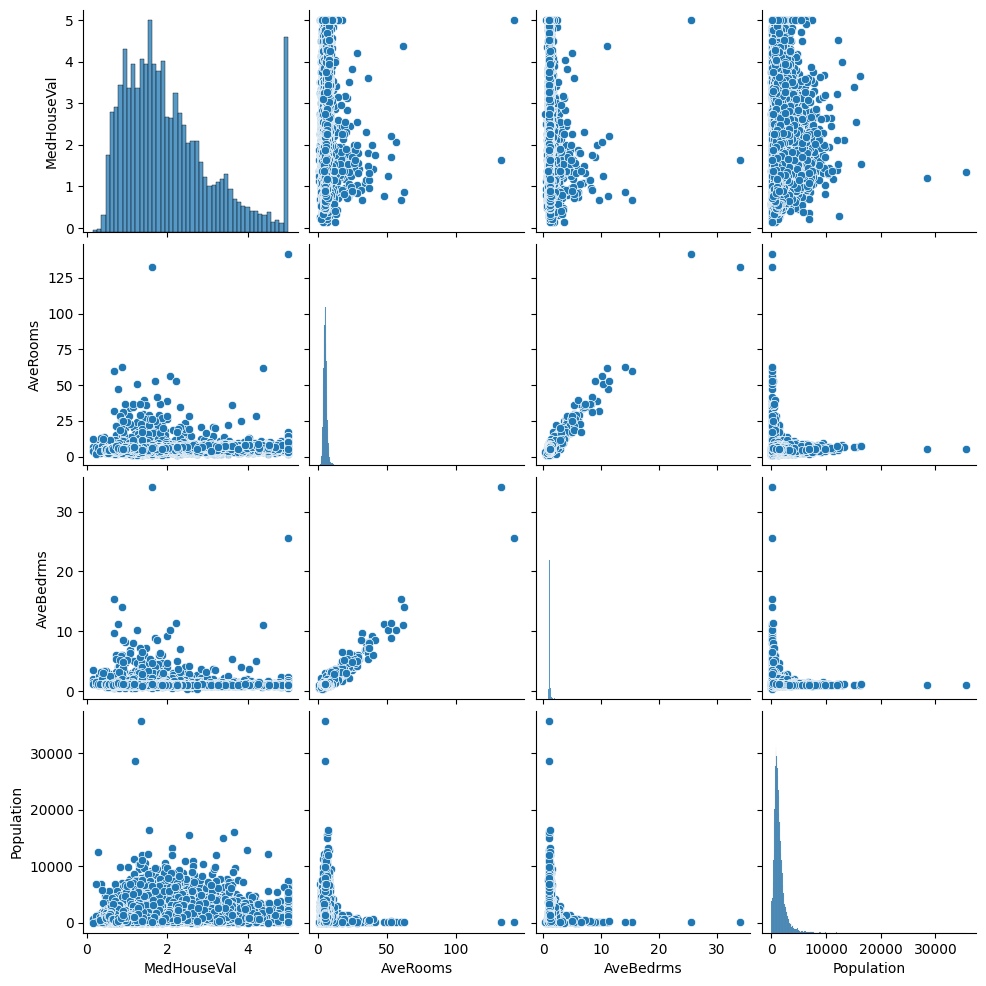

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizción de la distribución de precios de las casas
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Casas')
plt.show()

# Visualización de la relación entre características y precio
sns.pairplot(df[['MedHouseVal', 'AveRooms', 'AveBedrms', 'Population']])
plt.show()

# Paso 3: Preprocesamiento de Datos

No se requiere mucho preprocesamiento para este conjunto de datos, pero podríamos normalizar las características si es necesario.

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalización de características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('MedHouseVal', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['MedHouseVal'] = df['MedHouseVal']

# Paso 4: Modelado de Datos

Utilizaremos un modelo de regresión lineal para predecir los precios de las casas.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# División de datos en conjunto de entrenamiento y prueba
X = df_scaled.drop('MedHouseVal', axis=1)
y = df_scaled['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Paso 5: Evaluación y Validación de Modelos

Evaluamos el rendimiento del modelo en el conjunto de prueba.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')


Error cuadrático medio (MSE): 0.5558915986952441
Coeficiente de determinación (R²): 0.575787706032451


# Paso 6: Ajuste de Hiperparámetros
En este ejemplo, no ajustaremos hiperparámetros, pero podríamos explorar técnicas como la validación cruzada para optimizar el modelo.  **Lo veremos más adelante**


# Paso 7: Interpretación de Resultados
Interpretamos los coeficientes de regresión para entender qué características tienen más impacto en el precio de las casas.

In [20]:
# Coeficientes de regresión
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coeficiente'])
print(coefficients)


            Coeficiente
MedInc         0.852382
HouseAge       0.122382
AveRooms      -0.305116
AveBedrms      0.371132
Population    -0.002298
AveOccup      -0.036624
Latitude      -0.896635
Longitude     -0.868927


**MedInc (Ingreso Medio): 0.852382**
Este coeficiente positivo indica que, manteniendo todas las demás variables constantes, un aumento en el ingreso medio (MedInc) está asociado con un aumento en el precio de las casas. En promedio, por cada unidad de aumento en el ingreso medio, el precio de la casa aumenta en aproximadamente 0.852382 unidades.

**HouseAge (Edad de la Casa): 0.122382**
Este coeficiente positivo sugiere que, manteniendo todas las demás variables constantes, un aumento en la edad de la casa está asociado con un aumento en el precio de las casas. Sin embargo, el efecto es relativamente pequeño.

**AveRooms (Promedio de Habitaciones): -0.305116**
Este coeficiente negativo indica que, manteniendo todas las demás variables constantes, un aumento en el número promedio de habitaciones está asociado con una disminución en el precio de las casas. Este resultado puede parecer contraintuitivo y podría sugerir que el número de habitaciones puede no estar correctamente ajustado en relación con otras variables o que hay una interacción no capturada por el modelo.

**AveBedrms (Promedio de Dormitorios): 0.371132**
Este coeficiente positivo indica que, manteniendo todas las demás variables constantes, un aumento en el número promedio de dormitorios está asociado con un aumento en el precio de las casas. Es decir, un mayor número de dormitorios tiende a incrementar el valor de la propiedad.

**Population (Población): -0.002298**
Este coeficiente muy cercano a cero indica que el efecto de la población en el precio de las casas es muy pequeño y casi insignificante. Es decir, las variaciones en la población no tienen un impacto significativo en el precio de las casas.

**AveOccup (Promedio de Ocupación): -0.036624**
Este coeficiente negativo indica que, manteniendo todas las demás variables constantes, un aumento en el promedio de ocupación de las viviendas está asociado con una disminución en el precio de las casas. Esto podría sugerir que las áreas con mayor densidad de ocupación tienden a tener precios más bajos, posiblemente por razones de congestión o disponibilidad de espacio.

**Latitude (Latitud): -0.896635**
Este coeficiente negativo indica que, manteniendo todas las demás variables constantes, un aumento en la latitud (más al norte) está asociado con una disminución en el precio de las casas. Esto puede reflejar que las casas en ubicaciones más al norte tienden a ser más económicas.

**Longitude (Longitud): -0.868927**
Este coeficiente negativo indica que, manteniendo todas las demás variables constantes, un aumento en la longitud (más al oeste) está asociado con una disminución en el precio de las casas. Esto puede reflejar que las casas en ubicaciones más al oeste tienden a ser más económicas.

# Paso 7: Visualización de los resultados
Podemos visualizar la relación entre las predicciones y los valores reales en el conjunto de prueba.

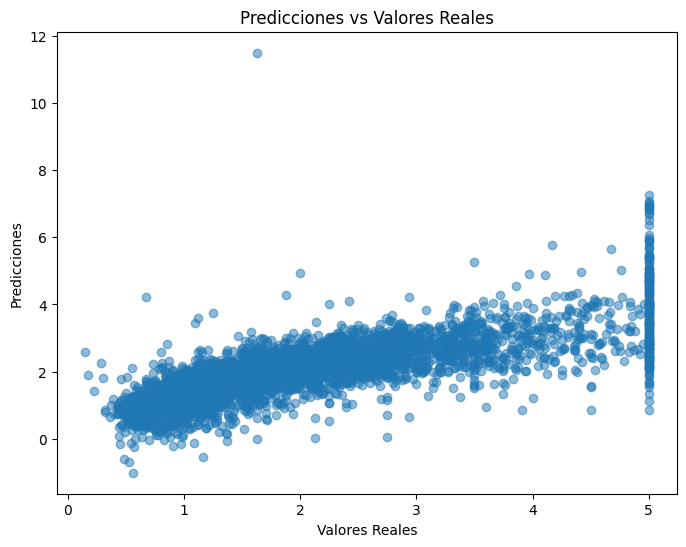

In [44]:
# Gráfico de dispersión entre predicciones y valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

Si el modelo está bien ajustado, deberíamos ver una buena correlación entre las predicciones y los valores reales. Sin embargo, siempre es útil observar las métricas (como el MSE y el R2 Score) para asegurarse de que el modelo no esté sobreajustado (Overfitting) o subajustado (underfitting).